---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup, Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 24/25</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 2</span><br>
     Themen: Polynomiale Regression, Kostenfunktion, Gradientenabstiegsverfahren<br>
     Abgabetermin: 03.11.2024, 23:59 Uhr<br>
     Punkte: 25 (+4)
</p>


---

**Namen:** Elkhan Alimatov (ela0016), Mazen Zidan (maz4669) , Hamdah Mariyam (ham2119)

---

# 1. Polynomiale Regression


### Daten
Der Datensatz `pressure_train.csv` (auf der Moodle-Seite des Praktikums (https://moodle.thi.de/course/view.php?id=6824)) enthält gemessene Werte der Temperatur (in Celsius) und des Dampfdrucks von Quecksilber. Plottet man die beiben Variablen sieht man, dass kein linearer Zusammenhang besteht.

![temp_pressur](Bilder/temp_pressure.png)



### Root Mean Squared Error (RMSE)
Der Root Mean Squared Error ist ein Standardmaß zur validierung der Güte eines Regressionsmodells. Seien $y^{(1)},...,y^{(n)}$ die wahren Werte und $f(x^{(1)}),...,f(x^{(n)})$ die Vorhersagen der Regression, dann ist der RMSE gegeben durch

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n \left(y^{(i)} - f(x^{(i)})\right)^2}.$$

Der RMSE ist also nichts anderes als die Wurzel aus den mittleren quadratischen Fehlern, oder die Wurzel aus der quadratischen Kostenfunktion.

## Aufgabe 1.1 [8 Punkte]
In dieser Aufgabe sollen Sie mittels **polynomialer Regression** auf den Daten aus dem Datensatz `pressure_train.csv` den Zusammenhang zwischen Dampfdruck aus der Temperatur modellieren.
1. Führen Sie explorative Analysen auf dem Datensatz `pressure_train.csv` durch (z.B. Korrelationsanalysen oder grafische Darstellungen), um zu entscheiden welchen Grad der polynomialen Regression Sie verwenden wollen. Begründen Sie ihre Wahl. D.h., wollen Sie ein Polynom mit dem Grad 2,3,4 oder höher an die Daten anpassen?
1. Erstellen Sie ein plonymielles Regressionsmodell `poly_reg` mit dem in 1.) ermittelten Grad.
1. Wie groß ist der **Root Mean Squared Error (RMSE)** auf den Daten `pressure_train.csv`? _Hinweis_: Verwenden Sie die Funktion `from sklearn.metrics import mean_squared_error`.
1. Importieren Sie den Testdatensatz `pressure_teset.csv`. Wie groß ist der Root Mean Squared Error (RMSE) auf den Testdaten? _Benchmark für den RMSE auf den Testdaten ist: 5.5_. Versuchen Sie ein Model mit einem besseren RMSE zu erstellen!

In [84]:
## Packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Lösung Aufgabe 1.1

#### Teil 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  19 non-null     int64  
 1   pressure     19 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 436.0 bytes
   temperature  pressure
0            0    0.0002
1           20    0.0012
2           40    0.0060
3           60    0.0300
4           80    0.0900
       temperature    pressure
count    19.000000   19.000000
mean    180.000000  124.336705
std     112.546287  224.622540
min       0.000000    0.000200
25%      90.000000    0.180000
50%     180.000000    8.800000
75%     270.000000  126.500000
max     360.000000  806.000000


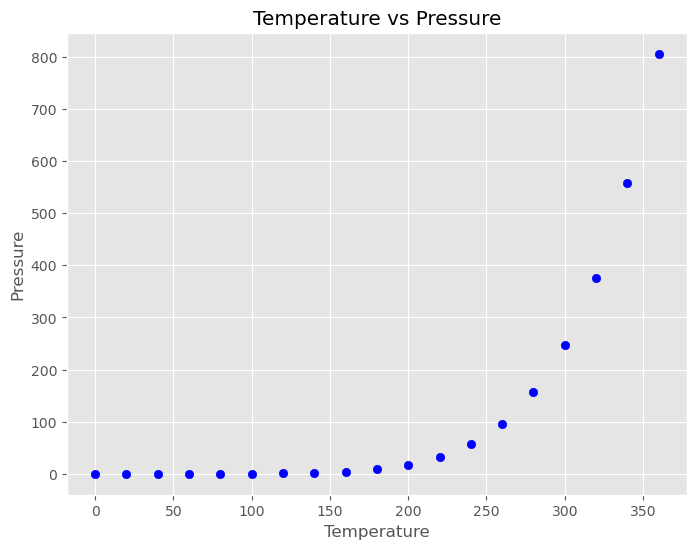

In [87]:
## Lösung der Aufgabe 1.1

#### Code here ####

# Teil 1

pressure_train = pd.read_csv("C:\\Users\\99470\\Downloads\\Aufgabenblatt 2\\Daten\\pressure_train.csv")

pressure_train.info()
print(pressure_train.head())
print(pressure_train.describe())

plt.figure(figsize=(8, 6))
plt.scatter(pressure_train['temperature'], pressure_train['pressure'], color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)
plt.show()

# Ausgehend von der Form des Streudiagramms, die auf ein potenziell exponentielles Wachstum hindeutet, 
# werde ich mit einem Polynom vom Grad 4 experimentieren, um die beste Anpassung zu finden



#### Teil 2

In [89]:
#### Code here ####

# Teil 2

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# Prepare the data for polynomial regression (degree 4)
X_train = pressure_train[['temperature']].values
y_train = pressure_train['pressure'].values

# Transform features to polynomial features (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)



LinearRegression()

#### Teil 3

In [91]:
#### Code here ####

# Teil 3

from sklearn.metrics import mean_squared_error

# Predict on the training set and calculate RMSE
y_train_pred = poly_reg_model.predict(X_train_poly)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('RMSE(train):',rmse_train)

RMSE(train): 4.618052667536897


#### Teil 4

In [93]:
#### Code here ####

# Teil 4

pressure_test = pd.read_csv("C:\\Users\\99470\\Downloads\\Aufgabenblatt 2\\Daten\\pressure_test.csv")

# prepare test data
X_test = pressure_test[['temperature']].values
y_test = pressure_test['pressure'].values

# Transform test features to polynomial features (degree 4 as determined from training)
poly_features = PolynomialFeatures(degree=4)
X_test_poly = poly_features.fit_transform(X_test)

# Predict on the test set and calculate RMSE
y_test_pred = poly_reg_model.predict(X_test_poly)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('RMSE(test):',rmse_test)

RMSE(test): 5.308521483140235


# 2. Gradientenabstiegsverfahren für die logistische Regression

Bei einer logistischen Regression wird die Wahrscheinlichkeit für die Zugehörigkeit zur Klaase 1 prognostiziert durch:
$$p(1|x) = \frac{1}{1+\exp(-f(x))}$$
mit 
$$f(x) = \beta_0 + \beta_1 x_1 + ... + \beta_m x_m.$$
Die Standard-Kostenfunktion zur Bewertung der Modellgüte ist die **Cross-Entropy**
$$C(\beta)=-\frac1n\sum_{i=1}^n y^{(i)}\ln(p(1|x))+(1-y^{(i)})\ln(1-p(1|x)),$$
wobei $n$ die Größe des Trainingsdatensatzes beschreibt und $y^{(i)}\in\{0,1\}$.

Ein iteratives Verfahren zur Ermittlung der optimalen Parameter $\beta_0,...,\beta_m$ ist das Gradientenabstiegsverfahren. In jedem Iterationsschritt werden die Parameter dabei nach der folgenden Vorschrift so lange angepasst, bis sich Konvergenz einstellt oder die maximale Anzahl an Iterationen erreicht ist
$$\beta = \beta - \alpha \nabla C(\beta)$$
bzw. für jedes $j=0,...,m$
$$\beta_j = \beta_j - \alpha \frac{d}{d\beta_j} C(\beta).$$

## Aufgabe 2.1 (Berechnung des Gradienten) [4 Punkte]
Berechnen Sie den Gradienten $\nabla C(\beta)$ für die Kostenfunktion.

_Hinweis_: Benutzen Sie die Kettenregel zur Bestimmung der Ableitungen. D.h. bestimmen Sie nacheinander die Ableitungen
* $\frac{d}{d p} L(y,p)$ für $L(y,p)=y^{(i)}\ln(p)+(1-y^{(i)})\ln(1-p)$ (Cross-Entropy)
* $\frac{d}{d z} S(z)$ für $S(z)=\frac{1}{1+\exp(-z)}$ (logistische Sigmoid-Funktion)
* $\frac{d}{d \beta_i} f(x)$ für $f(x) = \beta_0 + \beta_1 x_1 + ... + \beta_m x_m$ (Regression)

Die Kostenfunktion ist dann nämlich
$$ C(\beta) = L\left(y,S(f(x)) \right) $$
Bestimmen Sie dann über die Kettenregel die Ableitung der Kostenfunktion $\frac{d}{d\beta_i} C(\beta)$


1. Welche der folgenden Terme ist die korrekte Ableitung für $\frac{d}{d\beta_0} C(\beta)$?
    1. $\frac{d}{d\beta_0} C(\beta) =  1$
    1. $\frac{d}{d\beta_0} C(\beta) = -\sum_{i=1}^n \left(y^{(i)}-p(1|x^{(i)}) \right)$
    1. $\frac{d}{d\beta_0} C(\beta) = \frac{1}{n}\sum_{i=1}^n \left(y^{(i)}-p(1|x^{(i)}) \right)$
    1. $\frac{d}{d\beta_0} C(\beta) = -\frac{1}{n}\sum_{i=1}^n \left(y^{(i)}-p(1|x^{(i)}) \right)$
   
1. Welche der folgenden Terme ist die korrekte Ableitung für $\frac{d}{d\beta_j} C(\beta)$ für $j>0$?
    1. $\frac{d}{d\beta_j} C(\beta) = -\frac{1}{n}\sum_{i=1}^n x^{(i)}_j\left(y^{(i)}-p(1|x^{(i)}) \right)$   
    1. $\frac{d}{d\beta_j} C(\beta) = \sum_{i=1}^n \left(y^{(i)}-p(1|x^{(i)}) \right)$
    1. $\frac{d}{d\beta_j} C(\beta) = -\frac{1}{2n}\sum_{i=1}^n x^{(i)}_j\left(y^{(i)}-p(1|x^{(i)}) \right)$
    1. $\frac{d}{d\beta_j} C(\beta) = \frac{1}{n}\sum_{i=1}^n x^{(i)}_j\left(y^{(i)}-p(1|x^{(i)}) \right)$

**Antwort zu Aufgabe 2.1** <br>
1. C
1. D

## Aufgabe 2.2 (Zusatzaufgabe) (One-Hot-Encoding) [4 Punkte*]
**Diese Punkte sind nicht relevant für die Bestimmung der Bestehensgrenze, können aber von Ihnen als Zusatzpunkte gesammelt werden.**

Auf der Moodle Seite des Praktikum (https://moodle.thi.de/course/view.php?id=6824) finden Sie den Datensatz `insurance.csv`, welcher zu medizinischen Informationen eines Patiente auch die Kosten für die Krankenversicherung (`charges`) und die logarithmierten Kosten der Krankenversicherung (`log_charges`) enthält.

Im Datensatz befinden sich auch die drei kategoriellen Variablen `sex, smoker, region`. Bevor ein lineares Regressionsmodell in Python auf Daten trainiert werden kann, müssen alle kategoriellen Variablen in numerische transformiert werden.

Ihre Aufgabe: Führen Sie ein One-Hot-Encoding für die obigen drei Variablen durch und generieren Sie so einen neuen Datensatz `data_enc`, welcherr ausschließlich aus numerischen Variablen besteht.

_Hinweis_: Python stellt bereits eine Funktion für das One-Hot-Encoding bereit (`from sklearn.preprocessing import OneHotEncoder`) mittels der ein Encoding einfach durchgeführt werden kann.



In [99]:
## Packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [100]:
## Lösung für Aufgabe 2.2
from sklearn.preprocessing import OneHotEncoder

#### Code here ####
data = pd.read_csv("C:\\Users\\99470\\Downloads\\Aufgabenblatt 2\\Daten\\insurance.csv")
df = pd.DataFrame(data)
print(df.head())

categorial_columns = ['sex', 'smoker', 'region']

enc = OneHotEncoder(handle_unknown='ignore')
encoded = enc.fit_transform(df[categorial_columns])

one_hot_df = pd.DataFrame(encoded.toarray(), columns=enc.get_feature_names_out(categorial_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorial_columns, axis=1)

print(f"Encoded Data: \n{df_encoded}")

df_encoded.to_csv("data_enc.csv", index=False)



   age     sex     bmi  children smoker     region      charges  log_charges
0   19  female  27.900         0    yes  southwest  16884.92400     9.734176
1   18    male  33.770         1     no  southeast   1725.55230     7.453302
2   28    male  33.000         3     no  southeast   4449.46200     8.400538
3   33    male  22.705         0     no  northwest  21984.47061     9.998092
4   32    male  28.880         0     no  northwest   3866.85520     8.260197
Encoded Data: 
      age     bmi  children      charges  log_charges  sex_female  sex_male  \
0      19  27.900         0  16884.92400     9.734176         1.0       0.0   
1      18  33.770         1   1725.55230     7.453302         0.0       1.0   
2      28  33.000         3   4449.46200     8.400538         0.0       1.0   
3      33  22.705         0  21984.47061     9.998092         0.0       1.0   
4      32  28.880         0   3866.85520     8.260197         0.0       1.0   
...   ...     ...       ...          ...         

## Aufgabe 2.3 (Implementierung des Gradientenverfahrens) [10 Punkte]
In dieser Aufgabe sollen Sie das Gradientenabstiegsverfahren für die lineare Regression implementieren und ein lineares Regressionsmodell auf dem encodeten Datensatz aus der vorherigen Aufgabe erstellen, welches aus den medizinischen Informationen die logarithmischen Kosten `log_charges` prognostiziert. Den Datensatz mit den kodierten Variablen finden Sie auch auf der Moodle Seite des Praktikums (https://moodle.thi.de/course/view.php?id=6824) unter dem Namen `insurance_encoded.csv`.

_Hinweis_: Anstatt bei der Implementierung Schleife zu verwenden, können Sie auch die schnelleren Matrix-Operationen benutzen. Die Matrixmultiplikation kann z.B. durch die Funktion `numpy.dot` durchgeführt werden. Auch wichtig könnte die Funktion `numpy.transpose` zum transponieren einer Matrix sein.

Während des Gradientenabstiegsverfahren (GAV) werden mehrere Schritte ausgeführt, die in einzelnen Funktionen implementiert werden müssen.
1. **Schritt (Initialisierung der Parameter):** Zum Start des GAV müssen die Parameter initialisiert werden. Dies soll durch die Funktion `initialize_param(size_data)` erfolgen, die nach Eingabe der Datensatzgröße `size_data` einen Vektor der Länge `size_data` bestehend aus 1sen ausgibt. Ergänzen Sie den fehlenden Code in der Funktion `initialize_param(size_data)`.

In jedem Iterationsschritt werden jetzt die folgenden Schritte nacheinander durchgeführt:

2. **Schritt (Vorhersage der Werte der Zielvariablen):** Als erstes muss die Zielvariable für das aktuelle Modell (die aktuellen Parameter) berechnet werden. Die Funktion `predict(X, param)` berechnet für die Feature-Matrix `X` und die aktuellen Parameter `param` den Output der Regression. Ergänzen Sie den fehlenden Code in der Funktion `predict(X, param)`. _Hinweis_: Nutzen Sie Matrix-Operationen.

2. **Schritt (Berechnung der Gradienten der Kostenfunktion):** Basierend auf der Vorhersage aus dem vorherigen Schritt können jetzt die Gradienten der Kostenfunktion berechnet werden. Die Funktion `calculate_gradient_l2(Y, X, pred)` berechnet für die Eingabe der Feature-Matrix `X`, der realen Zielwerte `Y` und der Prognose durch das Modell `pred` den Wert der Gradienten für die quadratische Kostenfunktion. Ergänzen Sie den fehlenden Code in der Funktion `calculate_gradient_l2(Y, X, pred)` zur Berechnung der Gradienten. _Hinweis_: Nutzen Sie Matrix-Operationen.

2. **Schritt (Update der Parameter):** Im letzten Schritt werden die Parameter mittels Substraktion der Gradienten (siehe obige Formel) angepasst. Die Funktion `update_param(param, grad, learnrate)` führt nach Eingabe der Parameter `param`, der Gradienten `grad` und der Lernrate `learnrate` diese Operation durch und gibt die neuen Parameter zurück. Ergänzen Sie den fehlenden Code in der Funktion `update_param(param, grad, learnrate)`.

Die Funktion `gradient_descent_lin_reg(X, Y, learning_rate, max_iter)` führt das GAV durch, indem die obigen Schritte nacheinander durchgeführt werden.

5. Implemenieren Sie das GAV indem Sie die obigen Schritte in der richtigen Reihenfolge in der Funktion `gradient_descent_lin_reg(X, Y, learning_rate, max_iter)` ergänzen. Speichern Sie die neuen Parameter in der Variable `param`, welche von der Funktion zurückgegeben wird.

6. Generieren Sie aus dem Insurance-Datensatz (`insurance_encoded.csv`) die Zielvariable `Y`, welche die logarithmierten Kosten `log_charges` enthält und eine geeignete Feature-Matrix `X` (Achtung: Sind alle restlichen Variablen als Inputs geeignet?). Fügen Sie zu `X` auch eine weitere Spalte `bias` hinzu, welche nur 1sen beinhaltet und die Konstante in der linearen Gleichung repräsentiert. Trainieren Sie ein lineares Regressionsmodell mittels des GAV für die Daten indem Sie den folgenden Code ausführen:

```python
costs, param = gradient_descent_lin_reg(X, Y, learning_rate=0.0001, max_iter=40, err=1e-3)
```

Als Evaluation des Trainingsprozesses und des Models führen Sie folgenden Code aus

```python
plt.plot(costs)
plt.title("Costs")
plt.show()

plt.hist(predict(X, param)-Y)
plt.title("Distribution of errors")
plt.show()

# RMSE
print("RMSE: ", np.sqrt(np.mean((predict(X, param)-Y)**2)))
```

Zur Kontrolle: Sie sollten sehen, dass die Kostenfunktion streng und schnell fällt. Nach 40 Iterationen sollte sie einen Wert von ca. 1.63 aufweisen. Der RMSE liegt ungefähr bei 1.8.

**Laden der pakete und Hilfsfunktion**

In [103]:
## Packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [104]:
## calculate loss
def calculate_L2_cost(Y, pred):
    l2_loss = 0.5*np.mean((Y-pred)**2)
    return(l2_loss)

**Beginn Ihrer Lösung für Aufgabe 2.3**

In [106]:
## initialize parameter
def initialize_param(size_data):
    
    ### --- Code here --- ###
    param = np.ones(size_data)
    ### ----------------- ###
    
    return(param)

In [107]:
## Forward Function
def predict(X, param):
    
    ### --- Code here --- ###
    pred = np.dot(X, param)
    ### ----------------- ###
    
    return(pred)

In [108]:
## calculate gradient
def calculate_gradient_l2(Y, X, pred):
    
    ### --- Code here --- ###
    cost = 1/(2*len(Y)) * np.sum((Y-pred)**2)
    x_transpose = np.transpose(X)
    grad = 1/len(Y) * np.dot(x_transpose, (Y - pred))
    ### ----------------- ###
    
    return(grad)

In [109]:
## update param
def update_param(param, grad, learnrate):
    
    ### --- Code here --- ###
    param = param + learnrate * grad
    ### ----------------- ###
    
    return (param)

In [110]:
## main function for gradient descent
def gradient_descent_lin_reg(X, Y, learning_rate, max_iter, err):
    
    cost_hist = []
    
    size_data = X.shape[1]
    
    # initialize parameter vector
    param = initialize_param(size_data)

    # Gradient descent iterations
    for i in range(max_iter):
        
        ### --- Code here --- ###
        
        prediction = predict(X, param)
        grad = calculate_gradient_l2(Y, X, prediction)
        param = update_param(param, grad, learning_rate)

        ### ----------------- ###
        
        current_cost = calculate_L2_cost(Y, prediction) 
        cost_hist.append(current_cost)
        print(f'Iteration: {i} cost: {current_cost:10.8f}')
        
        # Stop if convergence is ensured
        if np.mean(grad**2)<err:
            break
        
    return cost_hist, param

In [111]:
## Lösung zu Aufgabenteil 6. (Model training)

#### Code here ####
data = pd.read_csv("C:\\Users\\99470\\Downloads\\Aufgabenblatt 2\\Daten\\insurance_encoded.csv")
df = pd.DataFrame(data)

print(df.head())

X = df.drop(['log_charges', 'charges'], axis=1).values
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
Y = df['log_charges'].values


   age     bmi  children      charges  log_charges  x0_female  x0_male  x1_no  \
0   19  27.900         0  16884.92400     9.734176        1.0      0.0    0.0   
1   18  33.770         1   1725.55230     7.453302        0.0      1.0    1.0   
2   28  33.000         3   4449.46200     8.400538        0.0      1.0    1.0   
3   33  22.705         0  21984.47061     9.998092        0.0      1.0    1.0   
4   32  28.880         0   3866.85520     8.260197        0.0      1.0    1.0   

   x1_yes  x2_northeast  x2_northwest  x2_southeast  x2_southwest  
0     1.0           0.0           0.0           0.0           1.0  
1     0.0           0.0           0.0           1.0           0.0  
2     0.0           0.0           0.0           1.0           0.0  
3     0.0           0.0           1.0           0.0           0.0  
4     0.0           0.0           1.0           0.0           0.0  


In [112]:
# Run gradient descnet
costs, param = gradient_descent_lin_reg(X, Y, learning_rate=0.0001, max_iter=40, err=1e-3)

Iteration: 0 cost: 2224.63024015
Iteration: 1 cost: 1210.06146860
Iteration: 2 cost: 658.63487058
Iteration: 3 cost: 358.92606824
Iteration: 4 cost: 196.02596689
Iteration: 5 cost: 107.48150215
Iteration: 6 cost: 59.34944794
Iteration: 7 cost: 33.18166765
Iteration: 8 cost: 18.95160160
Iteration: 9 cost: 11.20981495
Iteration: 10 cost: 6.99453902
Iteration: 11 cost: 4.69605104
Iteration: 12 cost: 3.43946488
Iteration: 13 cost: 2.74927794
Iteration: 14 cost: 2.36705254
Iteration: 15 cost: 2.15232570
Iteration: 16 cost: 2.02875377
Iteration: 17 cost: 1.95484190
Iteration: 18 cost: 1.90803566
Iteration: 19 cost: 1.87607470
Iteration: 20 cost: 1.85229358
Iteration: 21 cost: 1.83306772
Iteration: 22 cost: 1.81642527
Iteration: 23 cost: 1.80129265
Iteration: 24 cost: 1.78708458
Iteration: 25 cost: 1.77348115
Iteration: 26 cost: 1.76030672
Iteration: 27 cost: 1.74746411
Iteration: 28 cost: 1.73489879
Iteration: 29 cost: 1.72257946
Iteration: 30 cost: 1.71048746
Iteration: 31 cost: 1.69861103


**Evaluation of Training and Modell**

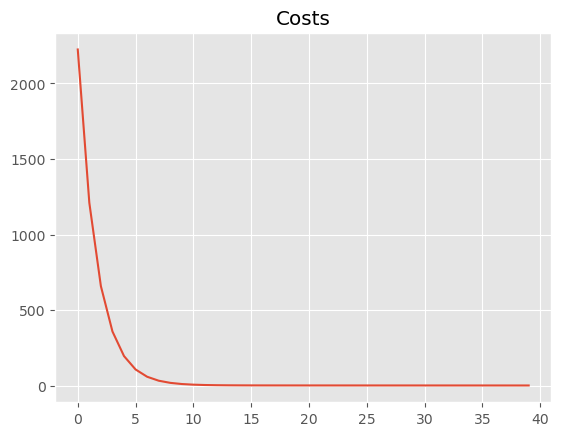

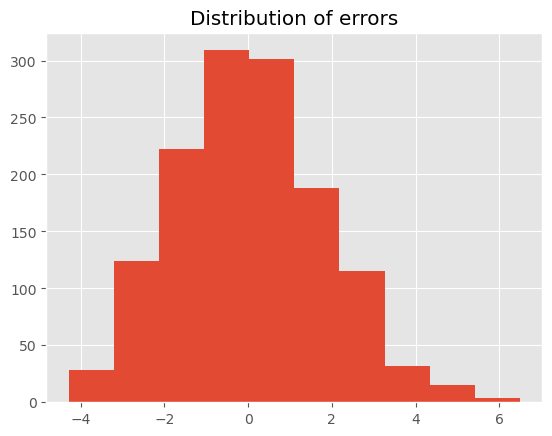

RMSE:  1.789140314658142


In [114]:
## Validation of Model and 
plt.plot(costs)
plt.title("Costs")
plt.show()

plt.hist(predict(X, param)-Y)
plt.title("Distribution of errors")
plt.show()

# RMSE
print("RMSE: ", np.sqrt(np.mean((predict(X, param)-Y)**2)))

# 3. Kostenfunktion

## Aufgabe 3.1 [3 Punkte]
Die 4 unteren Bilder zeichen jeweils eine Decision Boundary einer binäre Klassifikation zwischen Kreisen und Quadraten. Die roten Kreise sind neue hinzugenommene Daten für die jeweils die Werte einer der folgenden Versultfunktione angegeben sind **0-1-Loss, Hinge-Loss, Logistic-Loss** oder **Exponential-Loss**. Ordnen Sie die Bilder der jeweils verwendeten Verlustfunktion zu.

**A**

<img src="Bilder/loss_function1.png" alt="Drawing" style="width: 400px;"/>

**B**

<img src="Bilder/loss_function 31.png" alt="Drawing" style="width: 400px;"/>

**C**

<img src="Bilder/loss_function 2.png" alt="Drawing" style="width: 400px;"/>

**D**

<img src="Bilder/loss_function 4.png" alt="Drawing" style="width: 400px;"/>

**Antwort für Aufgabe 3.1**
* 0-1-Loss = A
* Hinge-Loss = D
* Logistic-Loss = B
* Exponential-Loss = C